In [4]:
# Step 1: Import Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import random


In [6]:
# Step 2: Create and Populate 'electronics_sales' Table
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS electronics_sales")

cursor.execute("""
    CREATE TABLE electronics_sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

products = ["Laptop", "Smartphone", "Tablet", "Monitor", "Keyboard", "Mouse", "Headphones", "Smartwatch"]

sample_data = [
    (
        random.choice(products),
        random.randint(1, 10),
        round(random.uniform(50, 1500), 2)
    )
    for _ in range(50)
]

cursor.executemany("INSERT INTO electronics_sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [7]:
# Step 3: Query the Sales Summary
query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM electronics_sales 
    GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [8]:
# Step 4: Display Summary
print("Electronics Sales Summary:")
print(df)

Electronics Sales Summary:
      product  total_qty   revenue
0  Headphones         30  13164.37
1    Keyboard         71  51700.34
2      Laptop         18  19251.37
3     Monitor         17  16235.67
4       Mouse         33  27620.43
5  Smartphone         67  58794.98
6  Smartwatch         31  28155.84
7      Tablet         23  22222.78


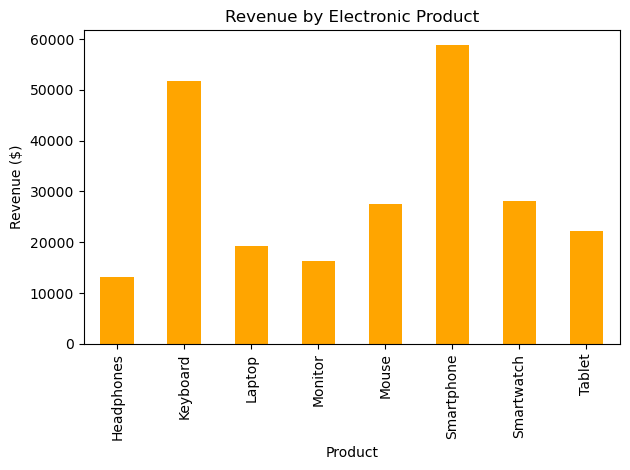

In [9]:
# Step 5: Plot Bar Chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Electronic Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("electronics_sales_chart.png")
plt.show()

In [10]:
# Step 6: Close Connection
conn.close()